# Email Spam Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
spam_df = pd.read_csv('Spam.csv')
spam_df.head()

,word_make,word_address,word_all,word_3d,word_our,word_over,word_remove,word_internet,word_order,word_mail,...,char_semicolon,char_leftbrac,char_leftsquarebrac,char_exclaim,char_dollar,char_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,3.756,61,278,1
1,1,1,1,0,1,1,1,1,0,1,...,0,1,0,1,1,1,5.114,101,1028,1
2,1,0,1,0,1,1,1,1,1,1,...,1,1,0,1,1,1,9.821,485,2259,1
3,0,0,0,0,1,0,1,1,1,1,...,0,1,0,1,0,0,3.537,40,191,1
4,0,0,0,0,1,0,1,1,1,1,...,0,1,0,1,0,0,3.537,40,191,1


In [3]:
spam_df.isnull().any().sum()

0

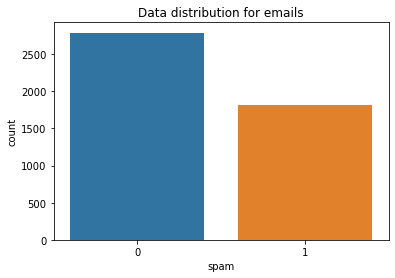

In [4]:
sns.countplot(spam_df['spam'])
plt.title("Data distribution for emails")
plt.show()

### splitting the data

Before spliting the data we need to define our X and y variables as follows
<li>X --> all the dependent variables</li>
<li>y --> the independent variable which is <strong>spam</strong></li>


In [5]:
X = spam_df.drop('spam', axis=1)
y = spam_df['spam']

print(X.shape, y.shape)

(4601, 57) (4601,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

print("X train: {}".format(X_train.shape))
print("y train: {}".format(y_train.shape))
print("X test: {}".format(X_test.shape))
print("y test: {}".format(y_test.shape))

X train: (3220, 57)
y train: (3220,)
X test: (1381, 57)
y test: (1381,)


### Building a KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc_score = []

for k in range(1,50):
    clfr = KNeighborsClassifier(n_neighbors=k)
    clfr.fit(X_train, y_train)
    y_pred = clfr.predict(X_test)
    vals = [k, accuracy_score(y_test, y_pred)]
    acc_score.append(vals)

# converting the multidimentional list into a numpy array
acc_score = np.array(acc_score)

print("Best Model accuracy is : {}".format(max(acc_score[:, 1])))

### Logistic regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
pred_lr = model.predict(X_test)

# Evaluation using metric score
lr_score = model.score(X_test, y_test)
print(f"Logistic Regression accuracy: {lr_score}")

print("*"*100)

# Evaluating using confussion matrix
print('\nModel evaluation using confusion matrix')
cnfsnmtx = confusion_matrix(y_test, pred_lr)
print(cnfsnmtx)

print("*"*100)

# Evaluation using classification report
print('\nModel evaluation using confusion classification report')
target_names = ['Spam','No spam']
print(classification_report(y_test, pred_lr, target_names=target_names))


### Best model to classify the data

From the two models, Logistic regression performed well on the test data, showing up with an accuracy of 94%.<br>
Logistic regression performs well on data with binary classes such as the email spam data.

The data distrinution is unequal i.e 
<li>spam (0) emails : 2788</li>   
<li>spam (1) emails : 1813</li> 
  
this makes KNN perform poorly with an accuracy of 80% compared to Logisutc regression

## Saving the best model
Logisic regression has the best accuracy on test data

In [ ]:
import pickle
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

# Diabetes Dataset from sklearn

In [ ]:
from sklearn import datasets
X,y = datasets.load_diabetes(return_X_y=True, as_frame=True)


In [ ]:
type(X)

In [ ]:
X

### Data partitioning

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size=20)


print("X train: {}".format(X_train2.shape))
print("y train: {}".format(y_train2.shape))
print("X test: {}".format(X_test2.shape))
print("y test: {}".format(y_test2.shape))

### Predictive moddeling

In [ ]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

# Intercept
print("intercept : ", model2.intercept_)
print('-'*50)

# slope
print("Slope : ", model2.coef_)
print('-'*50)

# predict
y_pred = model2.predict(X_test2)
print("Predicted vals : ", y_pred, sep='\n')
print('-'*50)

md_score = model2.score(X_train2, y_train2)
print('Variance: ', md_score)

### Physiological factors examination

In [ ]:
X_cols = X.columns.values
type(X_cols)

In [ ]:

fig = plt.figure(figsize=(20,40))
for i in range(len(X.columns)):
    column = X.columns[i]
    sub = fig.add_subplot(5,2,i+1)
    chart = sns.scatterplot(data = X, y = column, x = y, hue='sex', palette='deep')
    plt.title(f"{column} correlation")


In [ ]:
# Join the data frames
unsplitted_data = pd.concat([X,y], axis=1)

# find the coreration of all the variables
cor = unsplitted_data.corr()

# heat map visual
fig = plt.figure(figsize=(10,8))
sns.heatmap(cor, cmap='Blues')
plt.show()

The more dark or bright a variable is in relation to another variable, the more strongly positive or strongly negative respectively the correlation is.